# Feature Engineering

## Scaling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


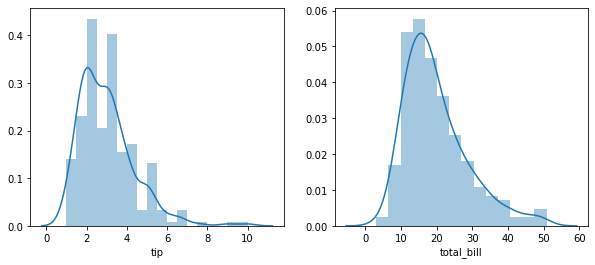

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.show()

In [7]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


mari kita coba transform data di atas menggunakan:  
* minmax scaler
* standard scaler
* robust scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [10]:
X=tips[['tip','total_bill']]

In [12]:
minmax=MinMaxScaler()
standard=StandardScaler()
robust=RobustScaler()

** MinMax scaler**

transform each variable into Range 0-1  
Sensitive to outliers

In [22]:
X_minmax=minmax.fit_transform(X)
X_minmax=pd.DataFrame(X_minmax,columns=['tip','total_bill'])

In [23]:
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [24]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


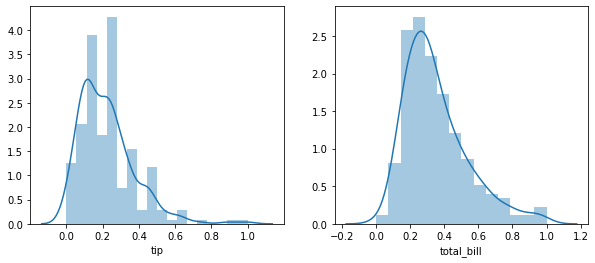

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_minmax['tip'])
plt.subplot(1,2,2)
sns.distplot(X_minmax['total_bill'])
plt.show()

**Standard Scaler**

transform each variable to mean=0, stdev=1

In [27]:
X_standard= standard.fit_transform(X)
X_standard=pd.DataFrame(data=X_standard,columns=['tip','total_bill'])

In [28]:
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [29]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


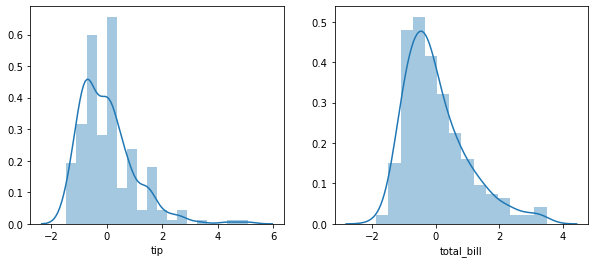

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['tip'])
plt.subplot(1,2,2)
sns.distplot(X_standard['total_bill'])
plt.show()

** Robust Scaler**

Transform each variable into small range (based on quantile)
not sensitive to outliers

In [31]:
X_robust=robust.fit_transform(X)
X_robust=pd.DataFrame(data=X_robust,columns=['tip','total_bill'])

In [32]:
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [33]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


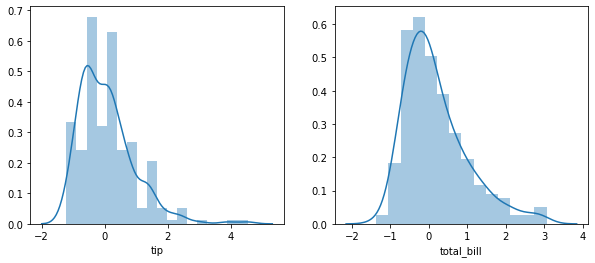

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(X_robust['total_bill'])
plt.show()

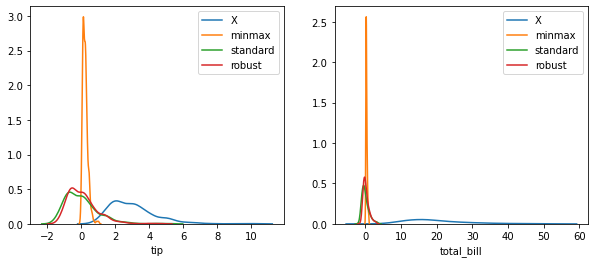

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X['tip'], hist=False, label='X')
sns.distplot(X_minmax['tip'], hist=False, label='minmax')
sns.distplot(X_standard['tip'], hist=False, label='standard')
sns.distplot(X_robust['tip'], hist=False, label='robust')
plt.subplot(1,2,2)
sns.distplot(X['total_bill'], hist=False, label='X')
sns.distplot(X_minmax['total_bill'], hist=False, label='minmax')
sns.distplot(X_standard['total_bill'], hist=False, label='standard')
sns.distplot(X_robust['total_bill'], hist=False, label='robust')
plt.show()

## Encoding

** One hot encoding**  

with get_dummies

In [36]:
tips_dummy=pd.get_dummies(tips,columns=['sex','smoker','day','time'])

In [37]:
tips_dummy

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


with sklearn

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
transformer= ColumnTransformer([
    ('encoder',OneHotEncoder(),['sex','smoker','day','time']) #name, transformer, columns
])

In [40]:
tips_encoded=transformer.fit_transform(tips)
tips_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [44]:
tips_encoded=pd.DataFrame(tips_encoded).astype(int)
tips_encoded

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,0,1,1,0,0,1,0,0,1,0
240,1,0,0,1,0,1,0,0,1,0
241,0,1,0,1,0,1,0,0,1,0
242,0,1,1,0,0,1,0,0,1,0


Kalau menggunakan sklearn transformer, nama kolom harus ditambahkan secara terpisah. Tapi, di kelas-kelas berikutnya, kita akan belajar bagaimana melakukan proses transform menggunakan column transformer lebih praktis untuk hyperparameter tunning dan cross validasi

In [47]:
transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [48]:
tips_encoded.columns=transformer.get_feature_names()

In [52]:
tips_encoded=pd.concat([tips[['total_bill','tip','size']],tips_encoded], axis=1)

In [53]:
tips_encoded

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


** Ordinal Encoder**  

with .map

In [54]:
tips_ordinal=tips.copy()

In [56]:
tips_ordinal['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [57]:
tips_ordinal['day']=tips_ordinal['day'].map({'Thur':1,'Fri':2,'Sat':3,'Sun':4})

In [60]:
tips_ordinal

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


with category encoder

In [61]:
# !pip install category_encoders

In [62]:
import category_encoders as ce

In [72]:
ordinal_mapping=[{'col':'day','mapping':{None:0,'Fri':2,'Thur':1, 'Sat':3, 'Sun':4}}]

In [74]:
ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)
df_ord=ordinal_encoder.fit_transform(tips['day'])
df_ord

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


Ordinal encoder to more than one features

In [75]:
ordinal_mapping = [
{'col':'day','mapping':{None:0,'Fri':2,'Thur':1, 'Sat':3, 'Sun':4}},
{'col':'time', 'mapping':{None:0, 'Lunch':1, 'Dinner':2}}
]

In [76]:
ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)
df_ord=ordinal_encoder.fit_transform(tips[['day','time']])

In [78]:
df_ord.head()

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2


In [79]:
tips_ordinal_encoded= pd.concat([ tips[['total_bill','tip','sex','smoker','size']], df_ord],axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,size,day,time
0,16.99,1.01,Female,No,2,4,2
1,10.34,1.66,Male,No,3,4,2
2,21.01,3.50,Male,No,3,4,2
3,23.68,3.31,Male,No,2,4,2
4,24.59,3.61,Female,No,4,4,2
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,3,2
240,27.18,2.00,Female,Yes,2,3,2
241,22.67,2.00,Male,Yes,2,3,2
242,17.82,1.75,Male,No,2,3,2


** Binary Encoder**

In [80]:
tips['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

In [81]:
binary_encoder= ce.BinaryEncoder(cols='day')
df_bin= binary_encoder.fit_transform(tips['day'])
df_bin

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


## Apply Several Preprocessing Method at once to Modelling Part 1: Ridge 

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

### Data

In [84]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Preprocessing

preprocess scheme:  
* one hot encoding : sex, smoker, time  
* binary encoding : day  
* robust scaler : total_bill  
* no treatment : size  

In [91]:
transformer= ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('binary',ce.BinaryEncoder(),['day']),
    ('scaler',RobustScaler(),['total_bill'])
    ],remainder='passthrough')

** Splitting**

In [87]:
X=tips.drop('tip',axis=1)
y=tips['tip']

In [88]:
X_train,X_test,y_train,y_test= train_test_split(
    X,y,
    random_state=10
) #default 70 train, 30 test

**Data Transform**

In [89]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [92]:
X_train_preprocessed=transformer.fit_transform(X_train)
X_test_preprocessed=transformer.transform(X_test)

In [93]:
X_train_preprocessed

array([[ 1.        ,  1.        ,  0.        , ...,  1.        ,
        -0.56639566,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.64769648,  3.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.31616983,  3.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.38211382,  2.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         1.11020777,  6.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.24661247,  2.        ]])

In [95]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)
X_test_preprocessed

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,0.0,-0.117435,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.251129,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.334237,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.070461,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.225836,2.0
...,...,...,...,...,...,...,...,...
56,0.0,1.0,1.0,0.0,1.0,1.0,-0.430894,2.0
57,1.0,0.0,1.0,0.0,1.0,1.0,-0.903342,2.0
58,1.0,1.0,0.0,0.0,1.0,0.0,1.390244,2.0
59,0.0,1.0,1.0,1.0,0.0,0.0,-0.670280,2.0


In [96]:
transformer.transformers_

[('one hot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('scaler', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [99]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [102]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [104]:
features=list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']
features

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill',
 'size']

In [105]:
X_test_preprocessed.columns=features
X_train_preprocessed.columns=features

In [106]:
X_train_preprocessed

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0
...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.0,0.0,0.0,1.0,0.007227,3.0
179,1.0,0.0,0.0,0.0,1.0,0.0,0.367660,2.0
180,1.0,0.0,0.0,0.0,0.0,1.0,-0.382114,2.0
181,0.0,0.0,1.0,0.0,1.0,1.0,1.110208,6.0


** Model fitting and evaluation**

In [107]:
model=Ridge()
model.fit(X_train_preprocessed,y_train)

Ridge()

In [108]:
y_pred=model.predict(X_test_preprocessed)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 1.0577456219830774


**Model Properties**

In [111]:
coef_table= pd.DataFrame({'features':features, 'coef':model.coef_})
coef_table

,features,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill,1.086144
7,size,0.172890


## Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

**Data**

In [113]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


** Preprocessing**

preprocess v1 scheme:  
* one hot encoding : sex, smoker, time
* ordinal encoding : day
* no treatment : size, total_bill

In [115]:
# ordinal_mapping=[
#     {'col':'day',
#     'mapping': {None:0,'Fri':2,'Thur':1,'Sat':3,'Sun':4}}
# ]
# ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)

In [116]:
# transformer= ColumnTransformer([
#     ('one hot',OneHotEncoder(drop='first'),['sex','smoker','time']),
#     ('ordinal',ordinal_encoder,['day'])], remainder='passthrough')

preprocess v2:
* one hot encoding : sex, smoker
* ordinal encoding : time, day
* no treatment : size, total_bill

In [120]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Fri':2,'Thur':1,'Sat':3,'Sun':4}},
    {'col':'time',
     'mapping':{None:0,'Lunch':1,'Dinner':2}}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols = ['day','time'],mapping = ordinal_mapping)

In [121]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker']),
                                 ('ordinal encoder',ordinal_encoder,['day','time'])
                                ], remainder = 'passthrough')

** Data Transform**

In [122]:
X_train_preprocessed=transformer.fit_transform(X_train)
X_test_preprocessed=transformer.transform(X_test)

In [123]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)

In [124]:
features= list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names()+ ['total_bill','size']

In [125]:
X_train_preprocessed.columns=features
X_test_preprocessed.columns=features

In [126]:
X_train_preprocessed

,x0_Male,x1_Yes,day,time,total_bill,size
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,1.0,1.0,29.80,6.0


** Model Fitting and Evaluation**

In [129]:
model=DecisionTreeRegressor(max_depth=3)
model.fit(X_train_preprocessed,y_train)

DecisionTreeRegressor(max_depth=3)

In [130]:
y_pred=model.predict(X_test_preprocessed)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 0.8414314225960589


** Model Properties**

feature importances and the decision tree.

' Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.'

In [132]:
importance_table=pd.DataFrame({
    'imp':model.feature_importances_
}, index=features)

In [133]:
importance_table

,imp
x0_Male,0.000000
x1_Yes,0.108978
day,0.000000
time,0.000000
total_bill,0.891022
size,0.000000


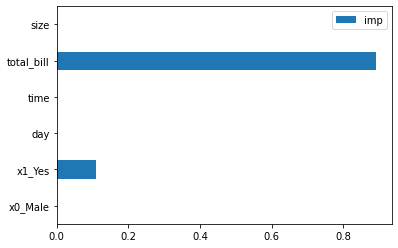

In [134]:
importance_table.plot(kind='barh')

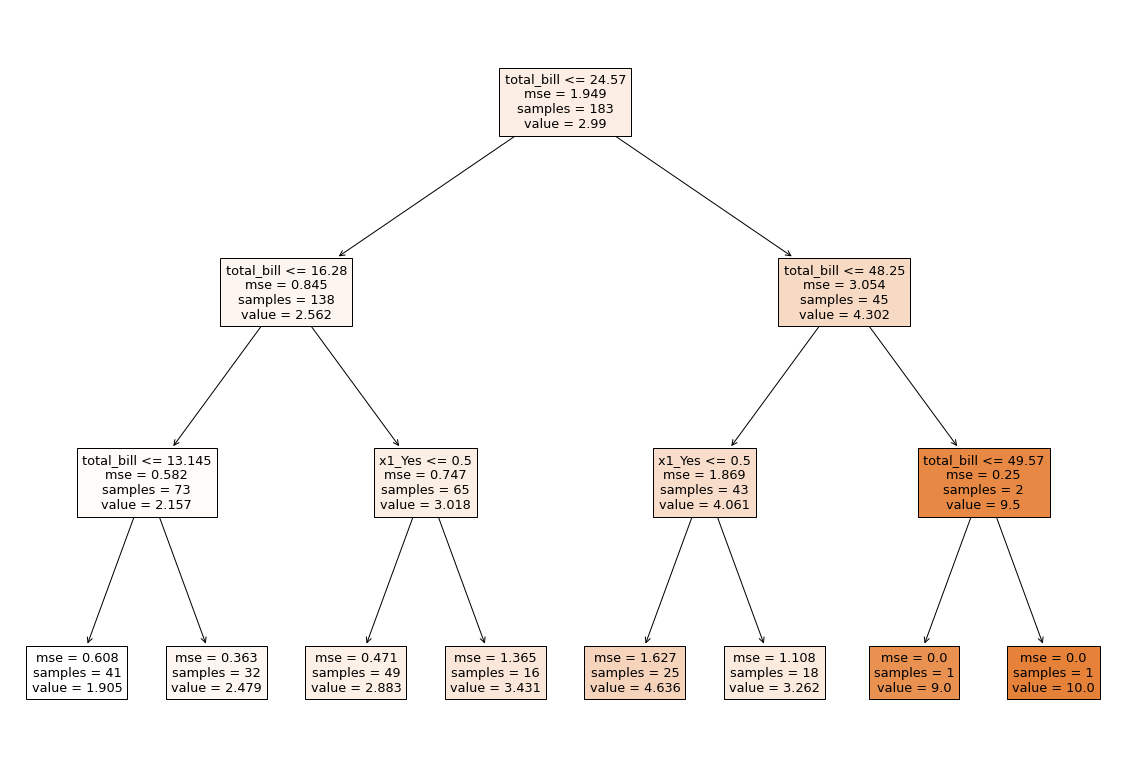

In [136]:
plt.figure(figsize=(20,14))
plot_tree(model, feature_names=features, filled=True)
plt.show()

In [137]:
y_pred

array([2.479375  , 3.43125   , 2.479375  , 3.43125   , 2.479375  ,
       3.26166667, 2.88306122, 3.26166667, 2.88306122, 2.88306122,
       3.43125   , 3.26166667, 1.90463415, 3.26166667, 2.88306122,
       2.88306122, 2.479375  , 2.479375  , 3.43125   , 2.479375  ,
       1.90463415, 2.479375  , 2.479375  , 1.90463415, 2.88306122,
       1.90463415, 3.43125   , 2.88306122, 1.90463415, 9.        ,
       4.636     , 3.26166667, 1.90463415, 1.90463415, 2.88306122,
       1.90463415, 2.88306122, 1.90463415, 3.43125   , 3.26166667,
       3.43125   , 3.26166667, 1.90463415, 3.26166667, 1.90463415,
       1.90463415, 2.88306122, 2.479375  , 1.90463415, 3.43125   ,
       2.88306122, 4.636     , 3.43125   , 4.636     , 1.90463415,
       3.43125   , 1.90463415, 1.90463415, 3.26166667, 1.90463415,
       2.88306122])